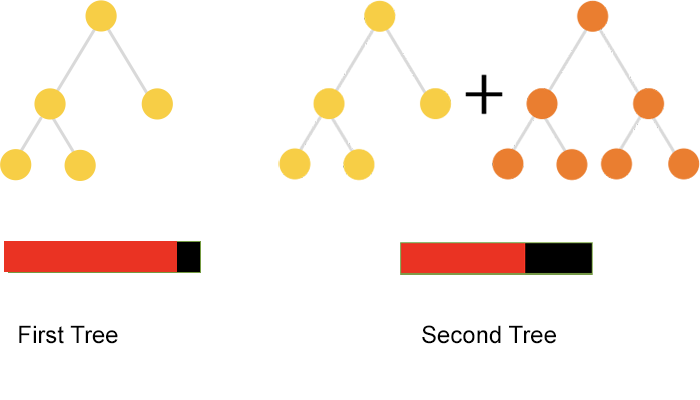

Повышение градиента — это метод машинного обучения, используемый, в частности, в задачах регрессии и классификации. Он дает модель прогнозирования в виде ансамбля слабых моделей прогнозирования, которые обычно представляют собой деревья решений.

Градиент это производная считаем производную и делаем шажочки в сторону минимума. y_true - это наш таргет, к которой мы движемся. Делаем производную по predicted.


In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_regression

# Создаем регрессию

In [2]:
X, y = make_regression(n_samples=10,n_features=3)

In [3]:
X

array([[-2.42226353,  0.33091924, -0.26040973],
       [-0.71276609, -1.12596854, -0.18823837],
       [-0.79030658, -0.93192974, -0.01136252],
       [-0.7356173 ,  0.31577332, -0.93377907],
       [-1.55582371,  0.53649943,  0.23791295],
       [-0.82827418, -1.25516407, -1.12891795],
       [-1.16638305,  0.96320943, -0.06024558],
       [ 0.88984014, -1.12464305, -1.30921041],
       [-1.96121883, -1.89227911,  2.14637711],
       [-0.78960759,  0.05977448, -1.94357831]])

In [4]:
y

array([-168.05016801, -168.08204145, -147.66031396,  -71.73817405,
        -58.66166072, -233.66915615,   -3.35644753,  -97.99440943,
       -224.07756626, -147.62675656])

In [5]:
df = pd.DataFrame(X) 

In [6]:
df

,0,1,2
0,-2.422264,0.330919,-0.260410
1,-0.712766,-1.125969,-0.188238
2,-0.790307,-0.931930,-0.011363
3,-0.735617,0.315773,-0.933779
4,-1.555824,0.536499,0.237913
5,-0.828274,-1.255164,-1.128918
6,-1.166383,0.963209,-0.060246
7,0.889840,-1.124643,-1.309210
8,-1.961219,-1.892279,2.146377
9,-0.789608,0.059774,-1.943578


In [7]:
df['y_true'] = y

y_true = continius value наш таргет

In [80]:
df

,0,1,2,y_true,y_pred,residual
0,-0.384506,-0.918538,2.977775,1,0.825661,0.19371
1,-0.637738,-2.071576,-1.604421,0,0.174339,-0.19371
2,-0.344048,-1.195240,-0.160901,1,0.825661,0.19371
3,0.801762,-1.078283,-0.756135,0,0.174339,-0.19371
4,-1.343986,1.755435,1.219766,1,0.825661,0.19371
5,-1.124122,-0.339450,0.620184,1,0.825661,0.19371
6,-0.228967,0.690152,-1.388793,0,0.174339,-0.19371
7,2.033789,1.325166,0.934289,1,0.825661,0.19371
8,-0.186563,1.082508,-1.584861,0,0.174339,-0.19371
9,0.572739,-1.511869,-1.408959,0,0.174339,-0.19371


Наша таблица готова, теперь осуществляем сам бустинг, сначала попробуем сделать это добавляя по 1 дереву за раз

# Бустинг

In [9]:
# константное предсказание
df['y_pred_0'] = df['y_true'].mean()

In [10]:
df 

,0,1,2,y_true,y_pred_0
0,-2.422264,0.330919,-0.260410,-168.050168,-132.091669
1,-0.712766,-1.125969,-0.188238,-168.082041,-132.091669
2,-0.790307,-0.931930,-0.011363,-147.660314,-132.091669
3,-0.735617,0.315773,-0.933779,-71.738174,-132.091669
4,-1.555824,0.536499,0.237913,-58.661661,-132.091669
5,-0.828274,-1.255164,-1.128918,-233.669156,-132.091669
6,-1.166383,0.963209,-0.060246,-3.356448,-132.091669
7,0.889840,-1.124643,-1.309210,-97.994409,-132.091669
8,-1.961219,-1.892279,2.146377,-224.077566,-132.091669
9,-0.789608,0.059774,-1.943578,-147.626757,-132.091669


## на сколько процентов ошибается

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
# в среднем ошибается на 0.37
mean_absolute_error(df['y_true'], df['y_pred_0'])

59.323197182801174

In [13]:
# остатки (наши ошибки), по которому учится следующее дерево
df['residual_0'] = df['y_true'] - df['y_pred_0']

In [14]:
df

,0,1,2,y_true,y_pred_0,residual_0
0,-2.422264,0.330919,-0.260410,-168.050168,-132.091669,-35.958499
1,-0.712766,-1.125969,-0.188238,-168.082041,-132.091669,-35.990372
2,-0.790307,-0.931930,-0.011363,-147.660314,-132.091669,-15.568645
3,-0.735617,0.315773,-0.933779,-71.738174,-132.091669,60.353495
4,-1.555824,0.536499,0.237913,-58.661661,-132.091669,73.430009
5,-0.828274,-1.255164,-1.128918,-233.669156,-132.091669,-101.577487
6,-1.166383,0.963209,-0.060246,-3.356448,-132.091669,128.735222
7,0.889840,-1.124643,-1.309210,-97.994409,-132.091669,34.097260
8,-1.961219,-1.892279,2.146377,-224.077566,-132.091669,-91.985897
9,-0.789608,0.059774,-1.943578,-147.626757,-132.091669,-15.535087


In [15]:
from sklearn.tree import DecisionTreeRegressor

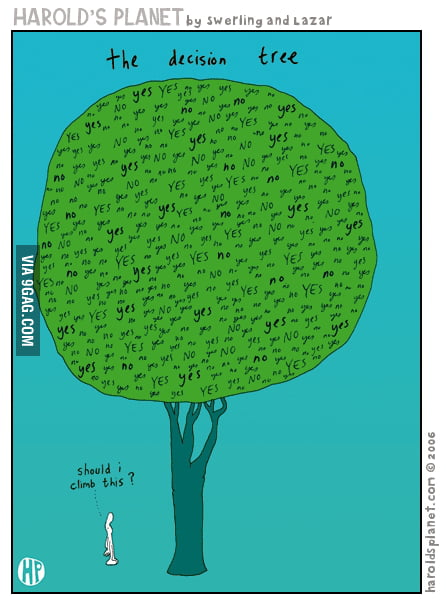

# Создаем первое дерево

In [16]:
# создаем пенек, может предсказывать 2 значения 
tree_1 = DecisionTreeRegressor(max_depth=1)

In [17]:
tree_1.fit(df[[0,1,2]], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [18]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [19]:
df 

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-2.422264,0.330919,-0.260410,-168.050168,-132.091669,-35.958499,-25.270654
1,-0.712766,-1.125969,-0.188238,-168.082041,-132.091669,-35.990372,-25.270654
2,-0.790307,-0.931930,-0.011363,-147.660314,-132.091669,-15.568645,-25.270654
3,-0.735617,0.315773,-0.933779,-71.738174,-132.091669,60.353495,-25.270654
4,-1.555824,0.536499,0.237913,-58.661661,-132.091669,73.430009,101.082615
5,-0.828274,-1.255164,-1.128918,-233.669156,-132.091669,-101.577487,-25.270654
6,-1.166383,0.963209,-0.060246,-3.356448,-132.091669,128.735222,101.082615
7,0.889840,-1.124643,-1.309210,-97.994409,-132.091669,34.097260,-25.270654
8,-1.961219,-1.892279,2.146377,-224.077566,-132.091669,-91.985897,-25.270654
9,-0.789608,0.059774,-1.943578,-147.626757,-132.091669,-15.535087,-25.270654


In [20]:
from sklearn.tree import plot_tree

[Text(167.4, 163.07999999999998, 'X[1] <= 0.434\nmse = 4862.132\nsamples = 10\nvalue = 0.0'),
 Text(83.7, 54.360000000000014, 'mse = 2693.469\nsamples = 8\nvalue = -25.271'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 764.667\nsamples = 2\nvalue = 101.083')]

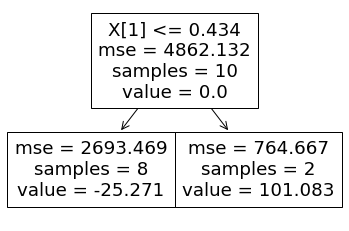

In [21]:
# четкая фича с индексом 0
plot_tree(tree_1)

# подключим burnung rate и начнем уменьшать нашу ошибку

In [22]:
# burning rate
nu = 0.1

In [23]:

df['y_pred_1'] = df['y_pred_0'] + nu*df['tree_pred_1']

In [24]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-2.422264,0.330919,-0.260410,-168.050168,-132.091669,-35.958499,-25.270654,-134.618735
1,-0.712766,-1.125969,-0.188238,-168.082041,-132.091669,-35.990372,-25.270654,-134.618735
2,-0.790307,-0.931930,-0.011363,-147.660314,-132.091669,-15.568645,-25.270654,-134.618735
3,-0.735617,0.315773,-0.933779,-71.738174,-132.091669,60.353495,-25.270654,-134.618735
4,-1.555824,0.536499,0.237913,-58.661661,-132.091669,73.430009,101.082615,-121.983408
5,-0.828274,-1.255164,-1.128918,-233.669156,-132.091669,-101.577487,-25.270654,-134.618735
6,-1.166383,0.963209,-0.060246,-3.356448,-132.091669,128.735222,101.082615,-121.983408
7,0.889840,-1.124643,-1.309210,-97.994409,-132.091669,34.097260,-25.270654,-134.618735
8,-1.961219,-1.892279,2.146377,-224.077566,-132.091669,-91.985897,-25.270654,-134.618735
9,-0.789608,0.059774,-1.943578,-147.626757,-132.091669,-15.535087,-25.270654,-134.618735


### уменьшение ошибки на каждом шаге

In [25]:
# ошибка упала на 3%
mean_absolute_error(df['y_true'], df['y_pred_1'])

56.290718724149414

In [26]:
# остатки (наши ошибки), по которому учится следующее дерево
df['residual_1'] = df['y_true'] - df['y_pred_1']

In [27]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,-2.422264,0.330919,-0.260410,-168.050168,-132.091669,-35.958499,-25.270654,-134.618735,-33.431433
1,-0.712766,-1.125969,-0.188238,-168.082041,-132.091669,-35.990372,-25.270654,-134.618735,-33.463307
2,-0.790307,-0.931930,-0.011363,-147.660314,-132.091669,-15.568645,-25.270654,-134.618735,-13.041579
3,-0.735617,0.315773,-0.933779,-71.738174,-132.091669,60.353495,-25.270654,-134.618735,62.880561
4,-1.555824,0.536499,0.237913,-58.661661,-132.091669,73.430009,101.082615,-121.983408,63.321747
5,-0.828274,-1.255164,-1.128918,-233.669156,-132.091669,-101.577487,-25.270654,-134.618735,-99.050421
6,-1.166383,0.963209,-0.060246,-3.356448,-132.091669,128.735222,101.082615,-121.983408,118.626960
7,0.889840,-1.124643,-1.309210,-97.994409,-132.091669,34.097260,-25.270654,-134.618735,36.624325
8,-1.961219,-1.892279,2.146377,-224.077566,-132.091669,-91.985897,-25.270654,-134.618735,-89.458831
9,-0.789608,0.059774,-1.943578,-147.626757,-132.091669,-15.535087,-25.270654,-134.618735,-13.008022


# 2 Дерево

In [28]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [29]:
tree_2.fit(df[[0,1,2]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [30]:
df['y_pred_2'] = df['y_pred_1'] + nu * tree_2.predict(df[[0,1,2]])

In [31]:
df 

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,-2.422264,0.330919,-0.260410,-168.050168,-132.091669,-35.958499,-25.270654,-134.618735,-33.431433,-131.447698
1,-0.712766,-1.125969,-0.188238,-168.082041,-132.091669,-35.990372,-25.270654,-134.618735,-33.463307,-142.017820
2,-0.790307,-0.931930,-0.011363,-147.660314,-132.091669,-15.568645,-25.270654,-134.618735,-13.041579,-131.447698
3,-0.735617,0.315773,-0.933779,-71.738174,-132.091669,60.353495,-25.270654,-134.618735,62.880561,-131.447698
4,-1.555824,0.536499,0.237913,-58.661661,-132.091669,73.430009,101.082615,-121.983408,63.321747,-118.812371
5,-0.828274,-1.255164,-1.128918,-233.669156,-132.091669,-101.577487,-25.270654,-134.618735,-99.050421,-142.017820
6,-1.166383,0.963209,-0.060246,-3.356448,-132.091669,128.735222,101.082615,-121.983408,118.626960,-118.812371
7,0.889840,-1.124643,-1.309210,-97.994409,-132.091669,34.097260,-25.270654,-134.618735,36.624325,-131.447698
8,-1.961219,-1.892279,2.146377,-224.077566,-132.091669,-91.985897,-25.270654,-134.618735,-89.458831,-142.017820
9,-0.789608,0.059774,-1.943578,-147.626757,-132.091669,-15.535087,-25.270654,-134.618735,-13.008022,-131.447698


### уменьшение ошибки на каждом шаге

In [32]:
# ошибка упала на 3%
mean_absolute_error(df['y_true'], df['y_pred_2'])

53.75388947300397

Мы разабрались с тем, как работает градиентный бустинг и теперь попробуем сделать тоже самое только в цикле
# Цикл

In [33]:
df = df[[0,1,2,'y_true']]

In [34]:
df

,0,1,2,y_true
0,-2.422264,0.330919,-0.260410,-168.050168
1,-0.712766,-1.125969,-0.188238,-168.082041
2,-0.790307,-0.931930,-0.011363,-147.660314
3,-0.735617,0.315773,-0.933779,-71.738174
4,-1.555824,0.536499,0.237913,-58.661661
5,-0.828274,-1.255164,-1.128918,-233.669156
6,-1.166383,0.963209,-0.060246,-3.356448
7,0.889840,-1.124643,-1.309210,-97.994409
8,-1.961219,-1.892279,2.146377,-224.077566
9,-0.789608,0.059774,-1.943578,-147.626757


In [46]:
#n = 10 деревьев
n = 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
    #residual
    df['residual'] = df['y_true'] - df['y_pred']
    #create trees
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0,1,2]], df['residual'])
    #rate
    df['y_pred'] += nu * tree.predict(df[[0,1,2]])
    #list
    trees.append(tree)
    #error
    print(mean_absolute_error(df['y_true'], df['y_pred']))
    

56.290718724149414
53.75388947300397
51.119789957135346
49.42658079384589
47.38801537031162
45.15726735303575
43.78947455606933
41.833093570407286
40.25479622614988
38.553239489463685


C:\Users\maxim\AppData\Local\Temp/ipykernel_16444/3861146936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_pred'] = df['y_true'].mean()
C:\Users\maxim\AppData\Local\Temp/ipykernel_16444/3861146936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual'] = df['y_true'] - df['y_pred']
C:\Users\maxim\AppData\Local\Temp/ipykernel_16444/3861146936.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [42]:
df

,0,1,2,y_true,y_pred,residual
0,-2.422264,0.330919,-0.260410,-168.050168,-160.348858,-7.792125
1,-0.712766,-1.125969,-0.188238,-168.082041,-157.136844,-11.036012
2,-0.790307,-0.931930,-0.011363,-147.660314,-143.322360,-4.428769
3,-0.735617,0.315773,-0.933779,-71.738174,-86.703981,14.874992
4,-1.555824,0.536499,0.237913,-58.661661,-56.441361,-2.311114
5,-0.828274,-1.255164,-1.128918,-233.669156,-225.523413,-8.236558
6,-1.166383,0.963209,-0.060246,-3.356448,-10.932623,7.485361
7,0.889840,-1.124643,-1.309210,-97.994409,-105.751349,7.666125
8,-1.961219,-1.892279,2.146377,-224.077566,-231.433546,8.173311
9,-0.789608,0.059774,-1.943578,-147.626757,-143.322360,-4.395211


# Новые данные

In [49]:
test = df[[0,1,2]].copy()

In [53]:
test['y_pred'] = df['y_true'].mean()

In [54]:
trees

[DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1)]

In [56]:
for tree in trees:
    test['y_pred'] += nu * tree.predict(df[[0,1,2]])
    

Считаем производную, вручную. чтобы доказать все что происходило выше

In [57]:
from sympy import *

In [59]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [61]:
1/2*(y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [62]:
diff(1/2*(y_true-y_pred)**2, y_pred)

1.0*y_pred - 1.0*y_true

# Задача на классификацию

In [64]:
from sklearn.datasets import make_classification

In [67]:
X, y = make_classification(n_samples=10,n_features=3, n_redundant = 0)

In [68]:
df = pd.DataFrame(X)

In [69]:
df['y_true'] = y

In [70]:
df 

,0,1,2,y_true
0,-0.384506,-0.918538,2.977775,1
1,-0.637738,-2.071576,-1.604421,0
2,-0.344048,-1.195240,-0.160901,1
3,0.801762,-1.078283,-0.756135,0
4,-1.343986,1.755435,1.219766,1
5,-1.124122,-0.339450,0.620184,1
6,-0.228967,0.690152,-1.388793,0
7,2.033789,1.325166,0.934289,1
8,-0.186563,1.082508,-1.584861,0
9,0.572739,-1.511869,-1.408959,0


In [72]:
df['y_pred'] = df['y_true'].mean()

In [74]:
df 

,0,1,2,y_true,y_pred
0,-0.384506,-0.918538,2.977775,1,0.5
1,-0.637738,-2.071576,-1.604421,0,0.5
2,-0.344048,-1.195240,-0.160901,1,0.5
3,0.801762,-1.078283,-0.756135,0,0.5
4,-1.343986,1.755435,1.219766,1,0.5
5,-1.124122,-0.339450,0.620184,1,0.5
6,-0.228967,0.690152,-1.388793,0,0.5
7,2.033789,1.325166,0.934289,1,0.5
8,-0.186563,1.082508,-1.584861,0,0.5
9,0.572739,-1.511869,-1.408959,0,0.5


In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score(df['y_true'],df['y_pred'])

0.5

In [77]:
#n = 10 деревьев
n = 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
    #residual
    df['residual'] = df['y_true'] - df['y_pred']
    #create trees
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0,1,2]], df['residual'])
    #rate
    df['y_pred'] += nu * tree.predict(df[[0,1,2]])
    #list
    trees.append(tree)
    #error
    print(roc_auc_score(df['y_true'],df['y_pred']))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Вау, четко и классно работает на классификации, но должно быть сложнее))

In [79]:
df

,0,1,2,y_true,y_pred,residual
0,-0.384506,-0.918538,2.977775,1,0.825661,0.19371
1,-0.637738,-2.071576,-1.604421,0,0.174339,-0.19371
2,-0.344048,-1.195240,-0.160901,1,0.825661,0.19371
3,0.801762,-1.078283,-0.756135,0,0.174339,-0.19371
4,-1.343986,1.755435,1.219766,1,0.825661,0.19371
5,-1.124122,-0.339450,0.620184,1,0.825661,0.19371
6,-0.228967,0.690152,-1.388793,0,0.174339,-0.19371
7,2.033789,1.325166,0.934289,1,0.825661,0.19371
8,-0.186563,1.082508,-1.584861,0,0.174339,-0.19371
9,0.572739,-1.511869,-1.408959,0,0.174339,-0.19371
